In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from matplotlib import rc

In [2]:
results_tie = pd.read_csv('../main/log/tie_new.csv', names=["algo", "experiment_id","only_inflate",   "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size","elite_blocks",
                                        "tie_inflate", "diff_sn_inflate", "size_sn_inflate",
                                       "tie_deflate", "diff_sn_deflate", "size_sn_deflate",
                                        "tie_mb_deflate", "diff_sn_mb_deflate", "size_sn_mb_deflate"])

In [60]:
plt.rc('axes', titlesize=25)  # Title size
plt.rc('axes', labelsize=25)  # Label size
plt.rc('xtick', labelsize=25)  # X-tick size
plt.rc('ytick', labelsize=25)  # Y-tick size
plt.rc('legend', fontsize=25)  # Legend size

plt.rcParams.update({
    "text.usetex": False,  # Don't use LaTeX rendering, use matplotlib's built-in rendering
    "font.family": "serif",  # Use a serif font family
    "font.serif": ["DejaVu Serif"],  # Use DejaVu Serif font which is similar to Computer Modern
})
# rc('text', usetex=True)

yatch


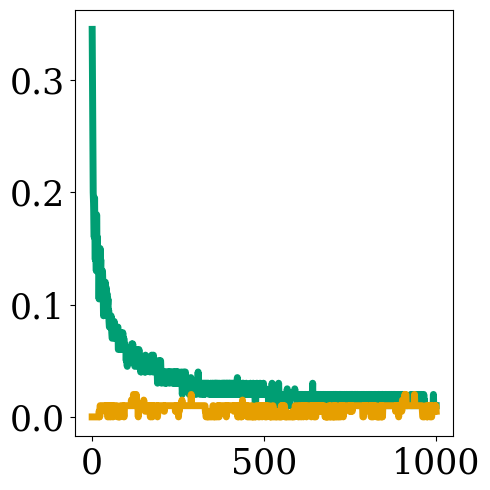

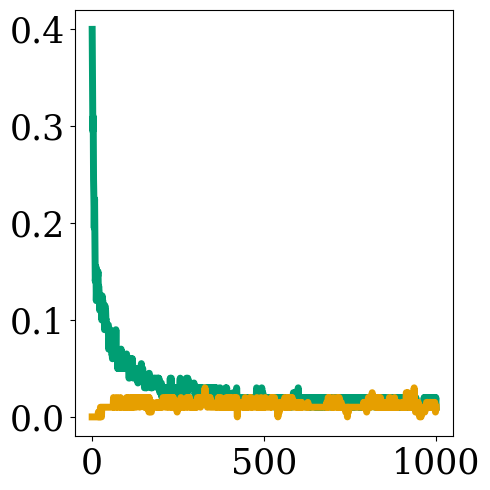

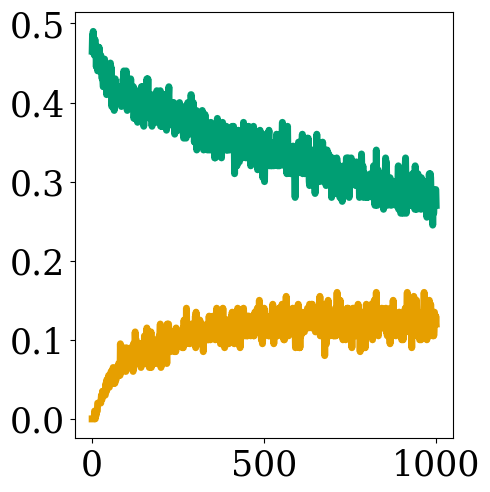

airfoil


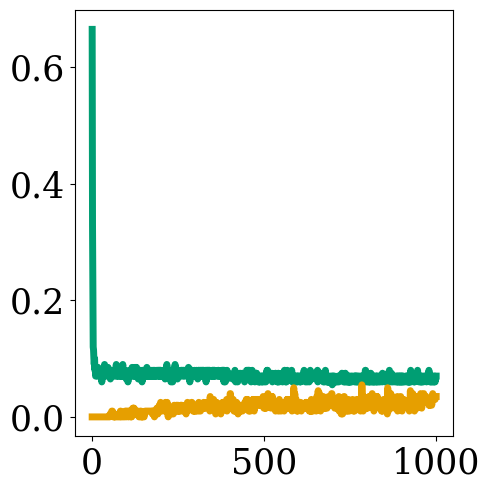

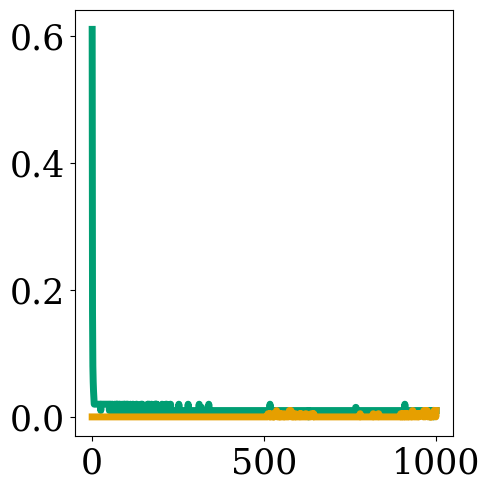

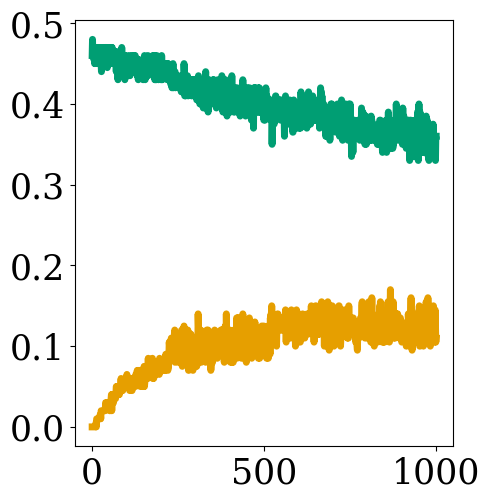

concrete_slump


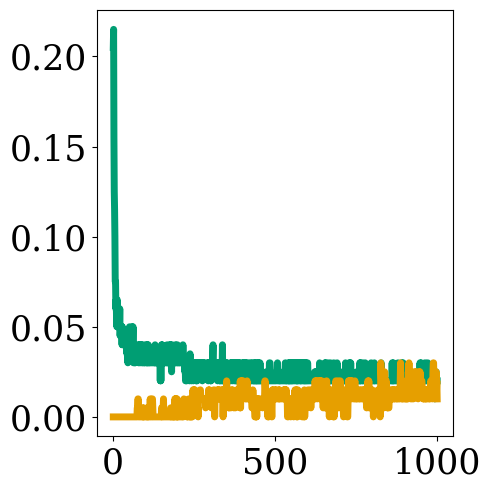

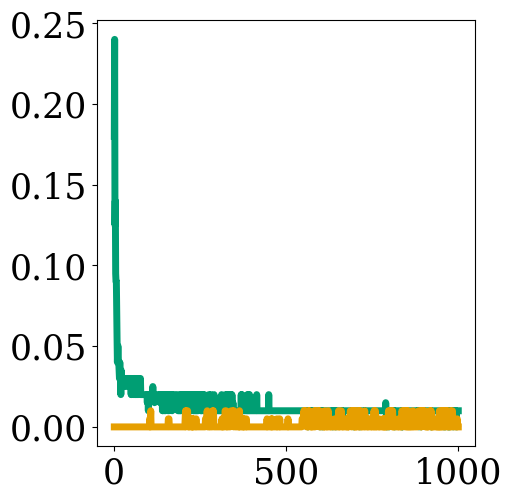

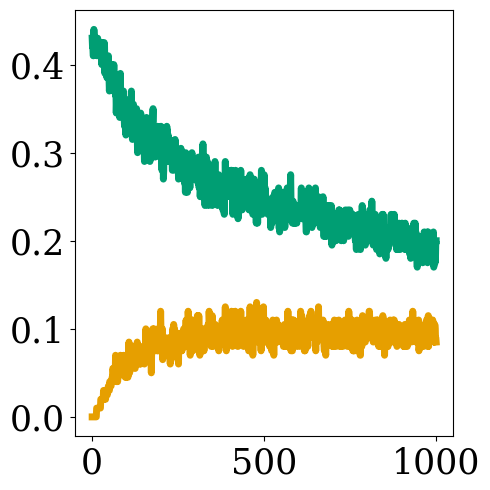

concrete_strength


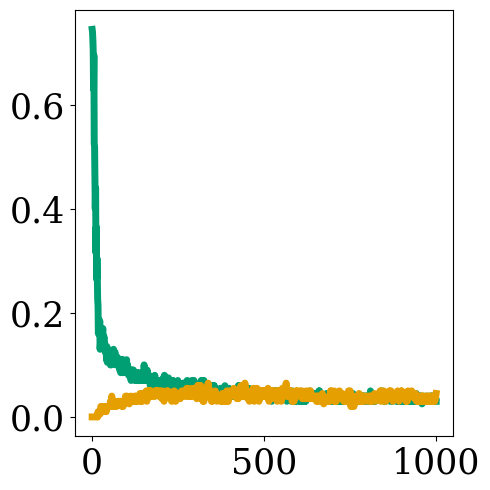

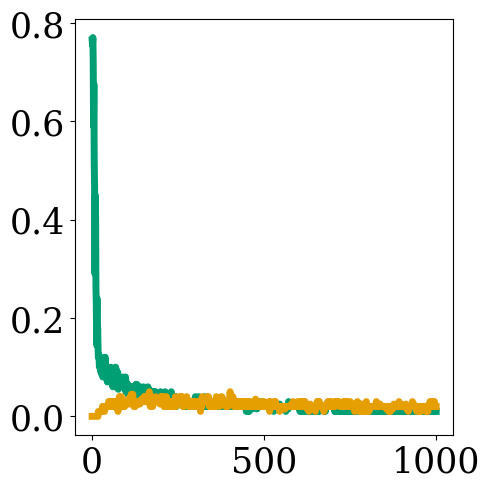

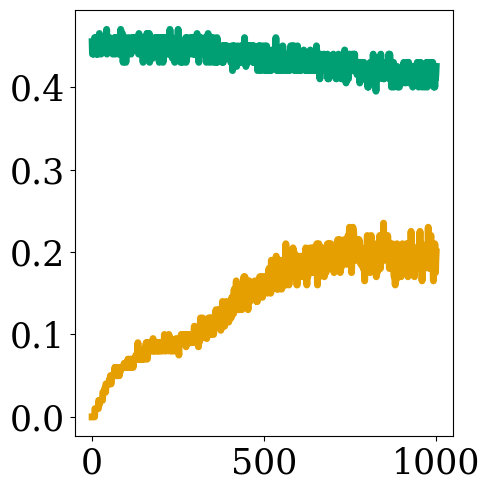

ppb


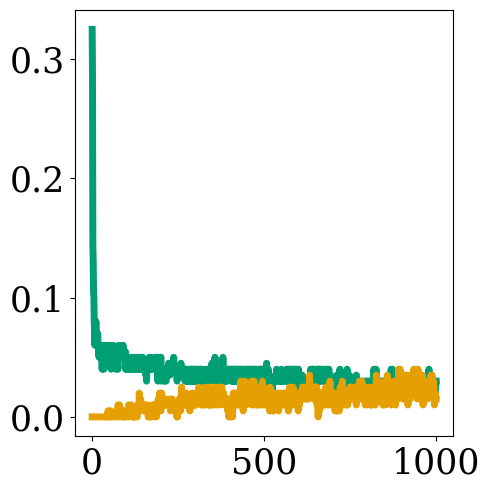

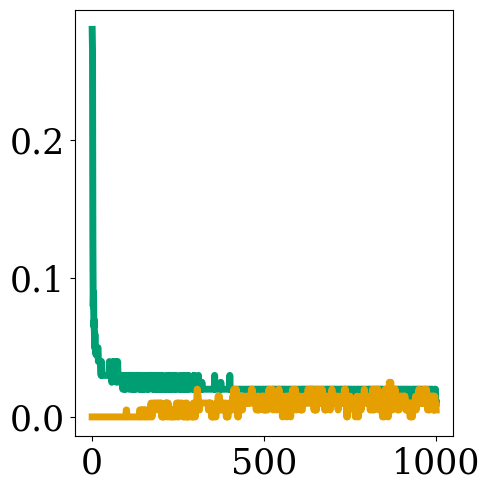

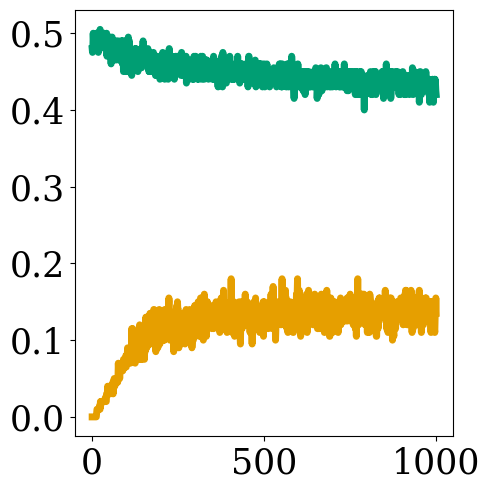

bioav


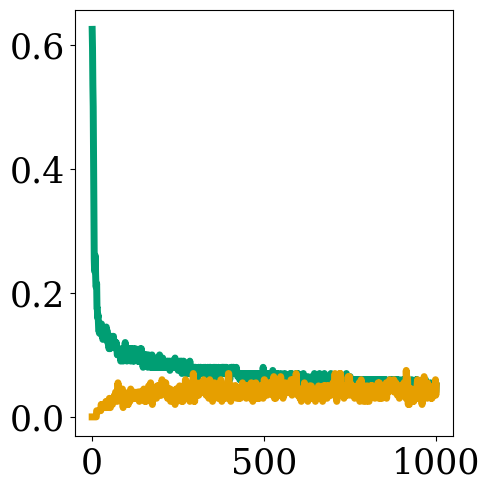

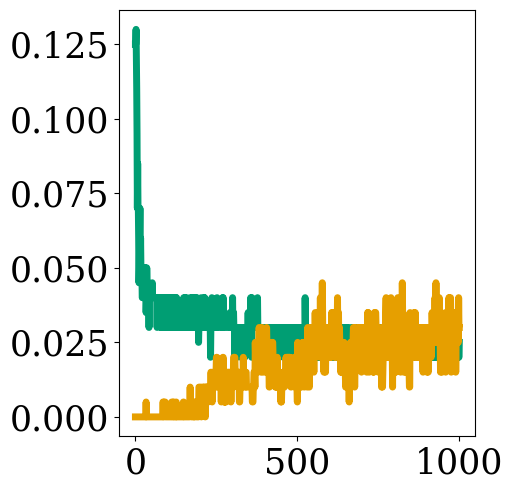

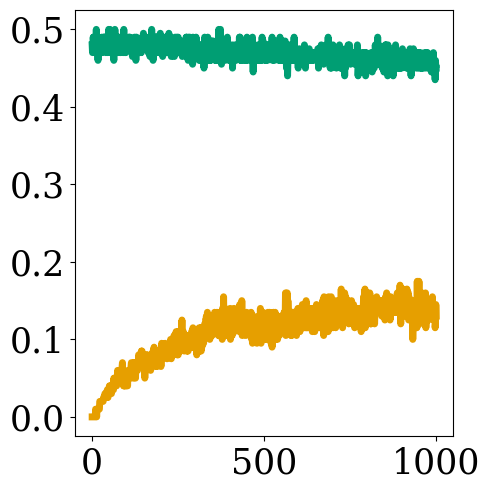

ld50


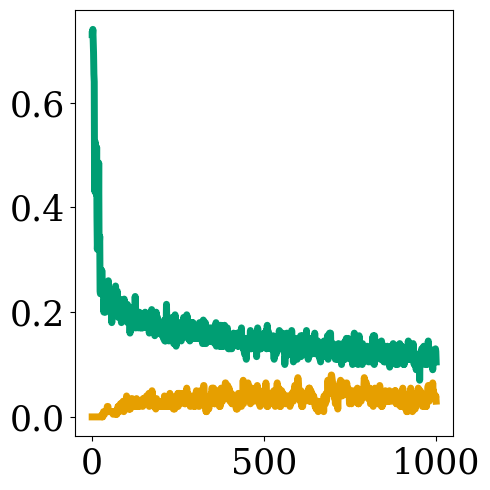

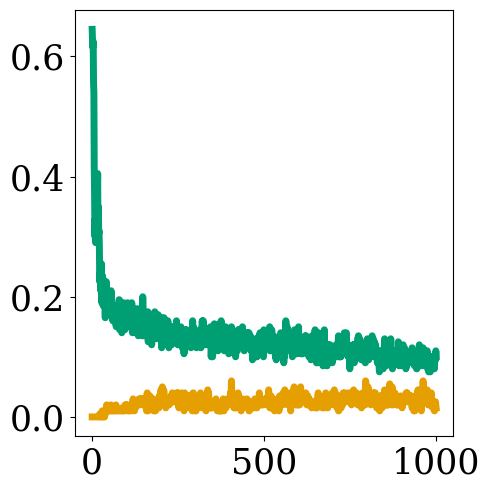

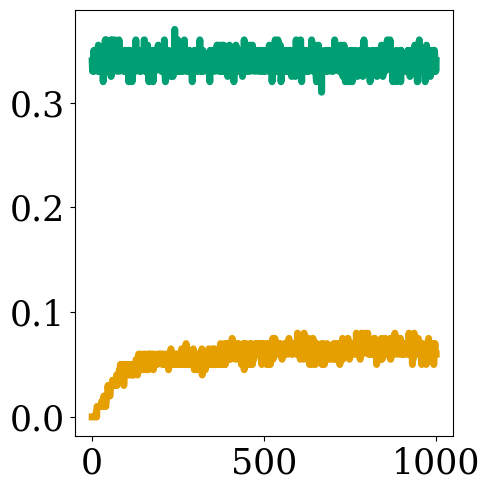

In [62]:
for data in results_tie.dataset.unique():
    print(data)

    for algo in results_tie.algo.unique():
        
            
        grouped = results_tie.query("algo == @algo and dataset == @data")[['generation',  "training_fitness",
                                   "test_fitness","elite_size","elite_blocks",
                                    "tie_inflate", "diff_sn_inflate", "size_sn_inflate",
                                   "tie_deflate", "diff_sn_deflate", "size_sn_deflate",
                                    "tie_mb_deflate", "diff_sn_mb_deflate", "size_sn_mb_deflate"]].groupby('generation').median()
        fig, ax = plt.subplots(figsize = (5,5))
    

        fig1, = ax.plot(grouped.index, grouped['tie_inflate'], label = 'inflate', linewidth = 5, color = '#009E73')
        fig2,  = ax.plot(grouped.index, grouped['tie_deflate'], label = 'deflate', linewidth = 5, color = '#E69F00')
  
        # plt.ylabel('TIE')
        # plt.xlabel('Generation')
        # plt.legend() #bbox_to_anchor=(1.1, 1.05)
            
        plt.tight_layout()
        plt.savefig(f'paper images/TIE/{data}_{algo[-4:]}_tie.pdf', dpi = 400, bbox_inches='tight', pad_inches=0.1)
        
        plt.show()

plt.rc('legend', fontsize=30, markerscale = 5)  # legend fontsize
handles, labels = ax.get_legend_handles_labels()
fig_legend = plt.figure(figsize=(10, 2))
ax_legend = fig_legend.add_subplot(111)
ax_legend.legend(handles, labels, loc='center', ncol=3, frameon=False)
ax_legend.axis('off')

fig_legend.tight_layout()
fig_legend.savefig(f"paper images/TIE/legend.pdf", dpi=400)
plt.close(fig_legend)
                


In [3]:
results_chull = pd.read_csv('../main/log/elite_change.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness", "elite_size","log","elite_child"])

In [4]:
chull = pd.read_csv('../main/log/chull.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size","distance_chull", "elite_child"])
chull.algo = chull.algo.replace({'STD-GSGP':'SLIM+2SIG', 'GSGP*1SIG':'SLIM*1SIG',
       'GSGP*1NORM':'SLIM*1NORM'})
chull.drop_duplicates(subset = ["algo",  "threshold", "dataset", "seed", "generation"], keep = 'last', inplace = True)

C:\Users\dfarinati\AppData\Local\Temp\ipykernel_22004\206491359.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  chull = pd.read_csv('../main/log/chull.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",


In [5]:
results_chull = results_chull.merge(chull[["algo",  "threshold", "dataset", "seed", "generation", 'distance_chull']], how = 'left', on = ["algo",  "threshold", "dataset", "seed", "generation"])
results_chull = results_chull[results_chull.dataset != '50'].reset_index(drop = True)
results_chull.threshold = results_chull.threshold.astype(int)
results_chull.drop_duplicates(subset = ["algo",  "threshold", "dataset", "seed", "generation"], keep = 'last', inplace = True)

In [6]:
colors = ['lightsalmon', 'lightblue', 'lightgreen']
e_colors = ['red', 'blue', 'green']
e_style = ['dashed', 'dotted', 'dashdot']

In [7]:
plt.rc('axes', titlesize=35)  # Title size
plt.rc('axes', labelsize=35)  # Label size
plt.rc('xtick', labelsize=35)  # X-tick size
plt.rc('ytick', labelsize=35)  # Y-tick size
plt.rc('legend', fontsize=25)  # Legend size

plt.rcParams.update({
    "text.usetex": False,  # Don't use LaTeX rendering, use matplotlib's built-in rendering
    "font.family": "serif",  # Use a serif font family
    "font.serif": ["DejaVu Serif"],  # Use DejaVu Serif font which is similar to Computer Modern
})
# rc('text', usetex=True)

<Figure size 1200x300 with 0 Axes>

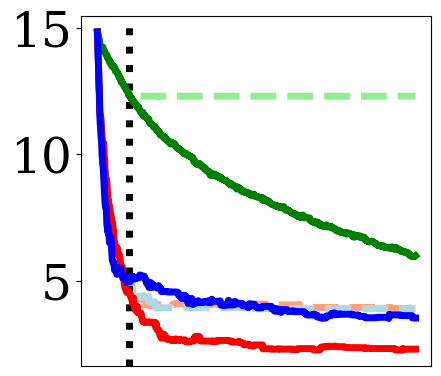

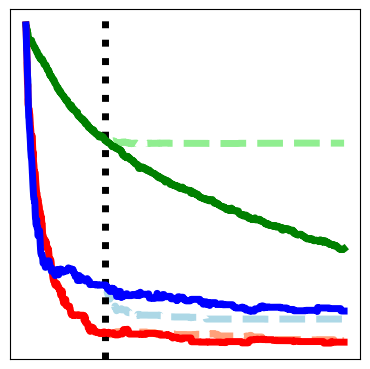

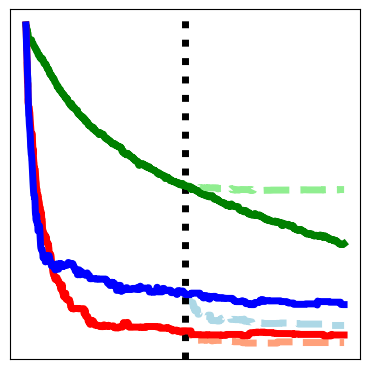

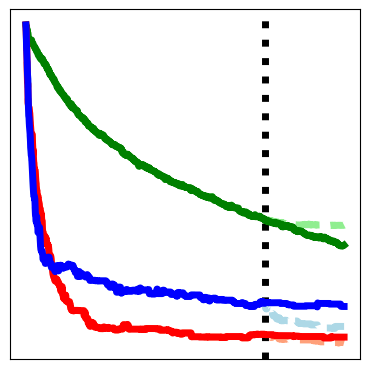

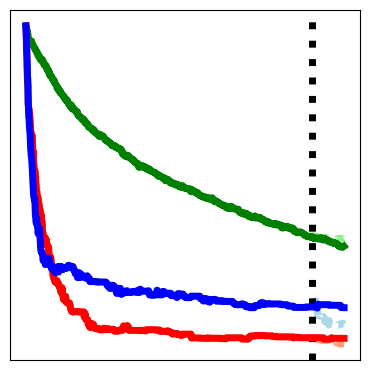

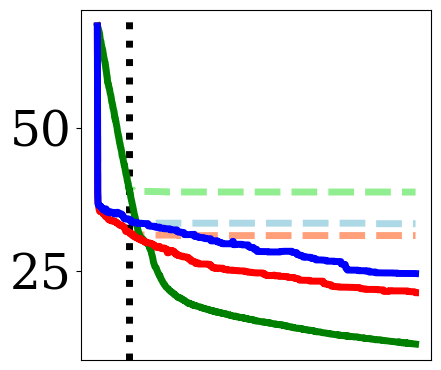

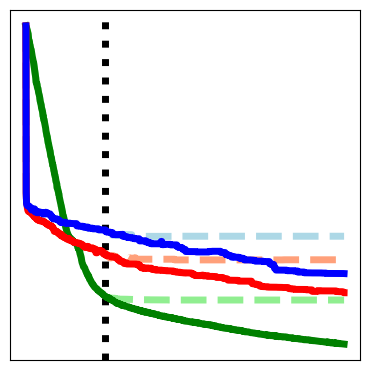

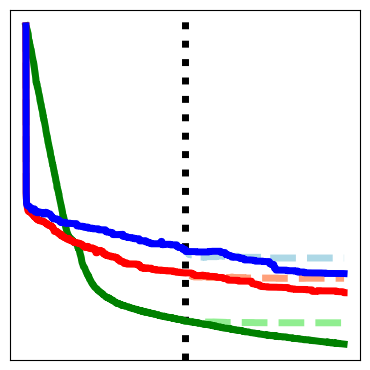

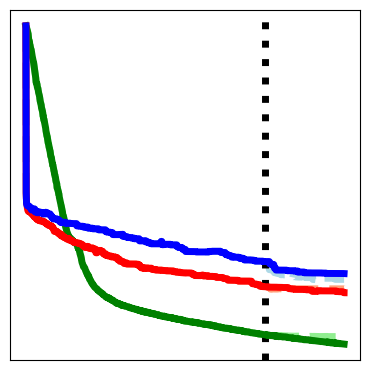

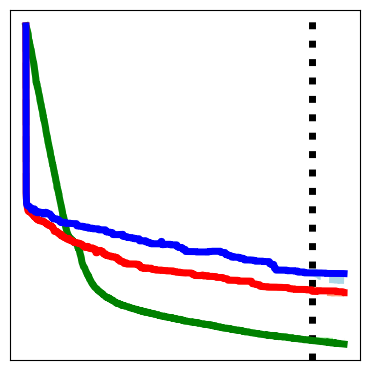

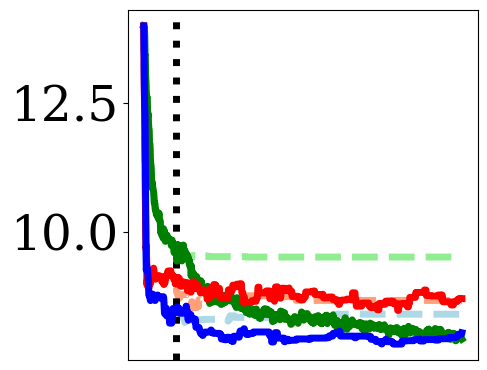

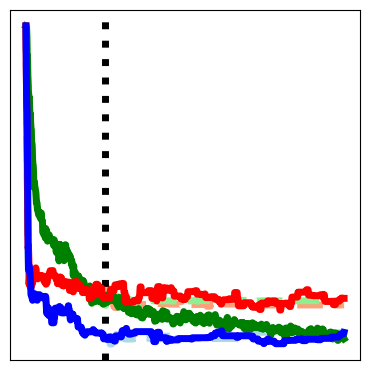

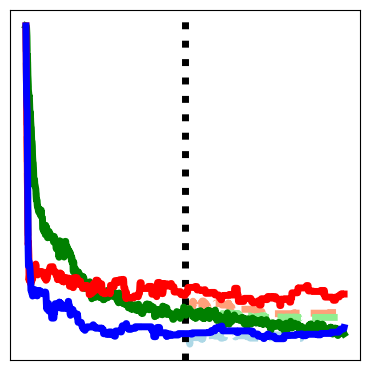

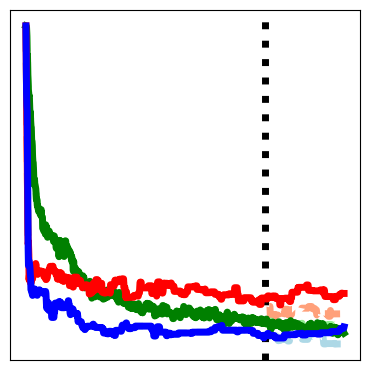

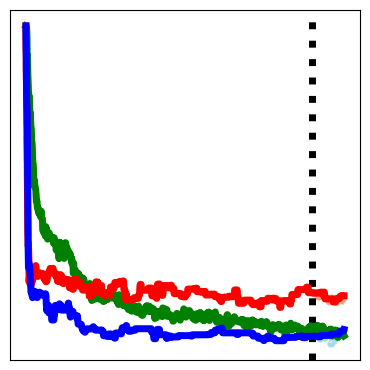

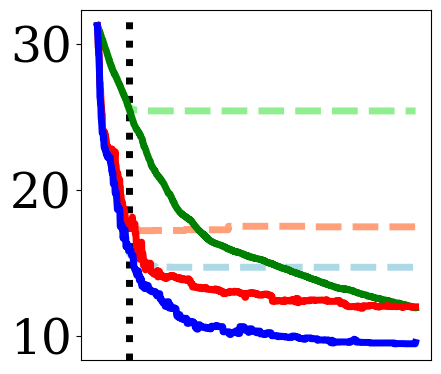

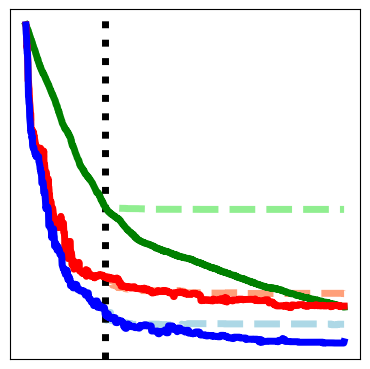

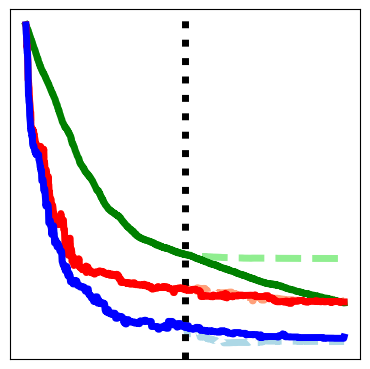

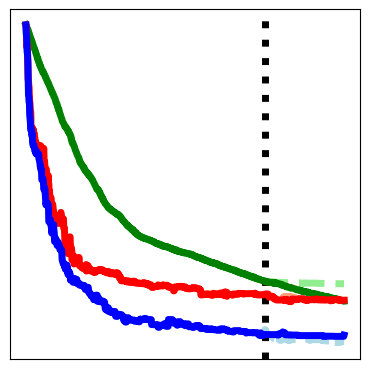

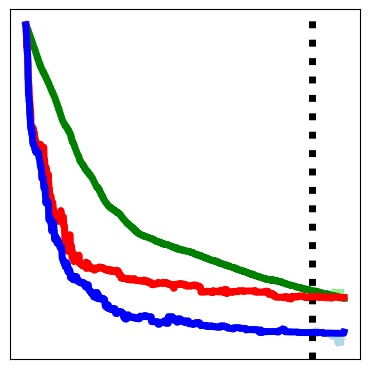

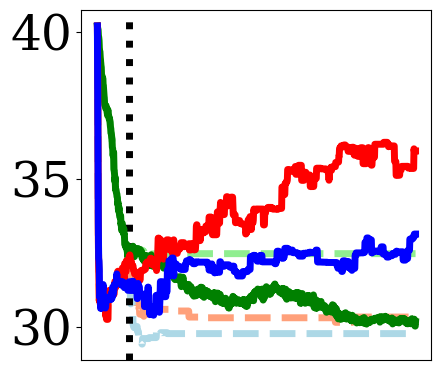

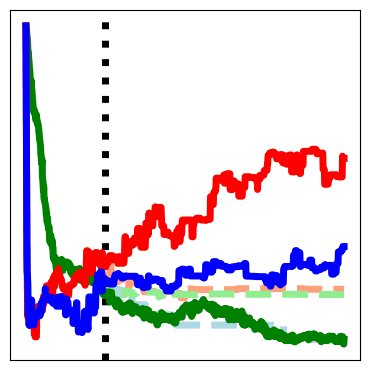

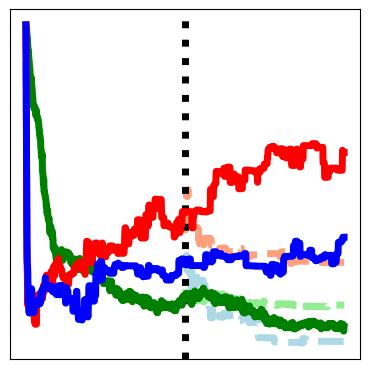

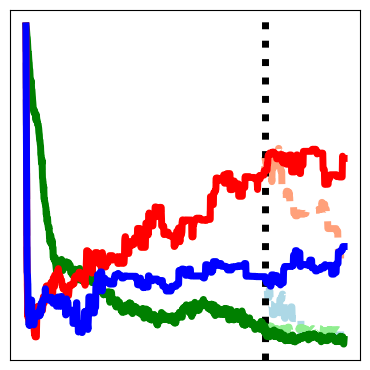

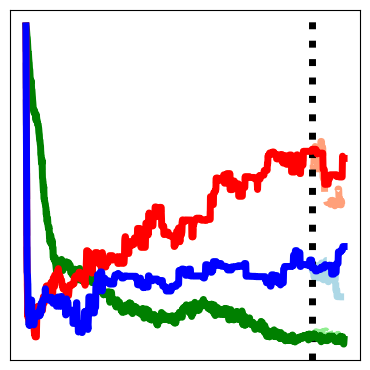

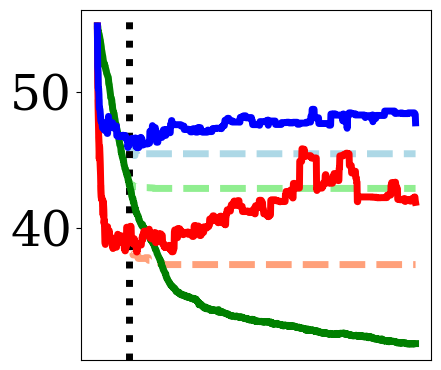

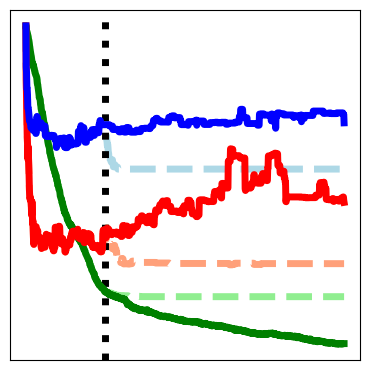

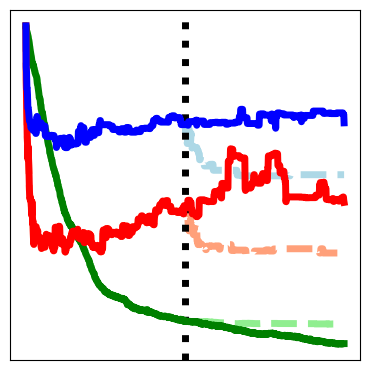

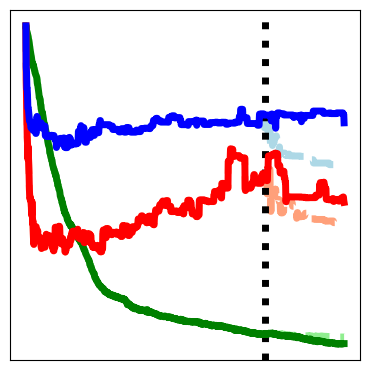

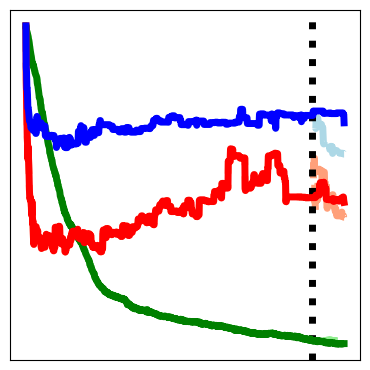

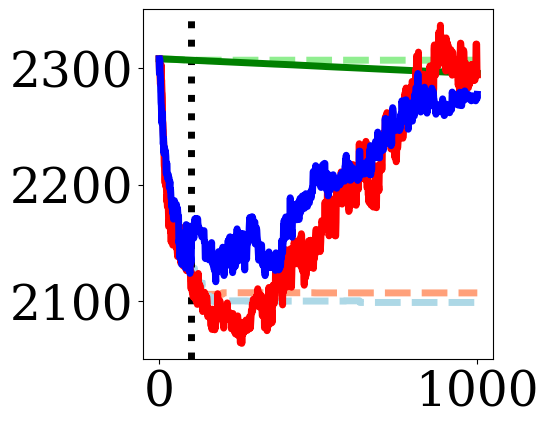

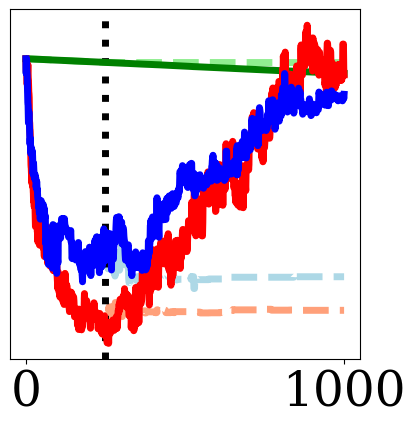

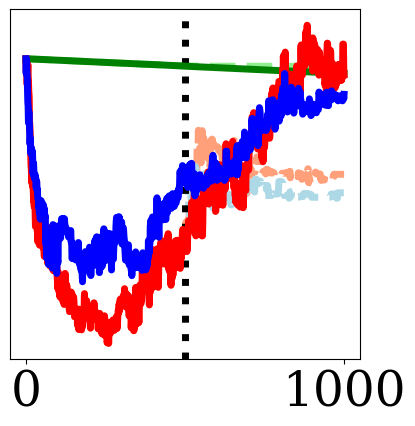

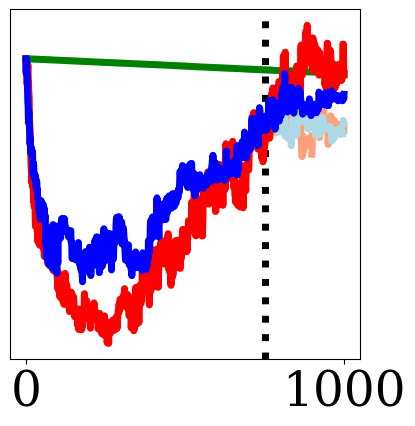

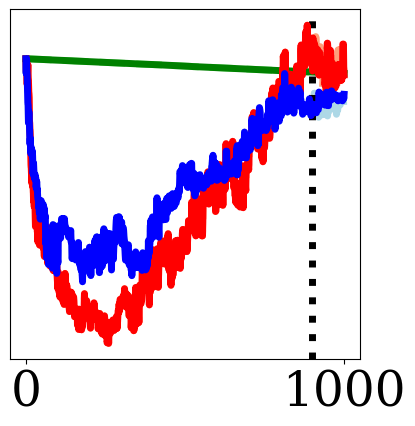

IndexError: list index out of range

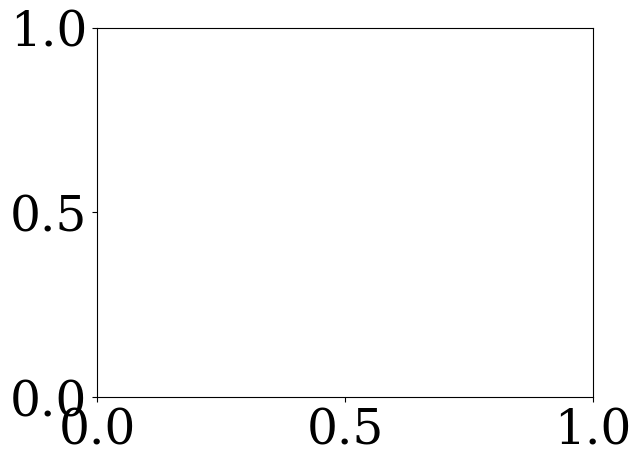

In [21]:
# test_lims = {'yatch' : (2, 16), 'airfoil' : (4, 66), 'concrete_slump': (7, 15), 'concrete_strength':(7, 33), 'ppb':(27, 42),
#        'bioav':(25, 60), 'ld50':(2000, 2400)}

# fig_legend = plt.figure(figsize=(12, 3))  # Adjust figsize as needed to prevent clipping
# ax_legend = fig_legend.add_subplot(111)

for data in results_chull.dataset.unique():
        
    std_gsgp = results_chull.query("algo == 'SLIM+2SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
    gsgp_x1sig = results_chull.query("algo == 'SLIM*1SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
    gsgp_x1norm = results_chull.query("algo == 'SLIM*1NORM' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()

    for th in [100, 250, 500, 750, 900]:
        
        plt.figure(figsize = (5,5))
        
        for i, algo in enumerate(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']):
    
            
            grouped = results_chull.query("algo == @algo and dataset == @data and threshold == @th")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull", "elite_child"]].groupby('generation').median()

            plt.plot(grouped.index, grouped['test_fitness'], color = colors[i], linestyle = 'dashed', linewidth = 5, label = 'DEFLATE') #, label = algo

        plt.axvline(x = th, linestyle = 'dotted', color = 'black', linewidth = 5)
        
        plt.plot(std_gsgp.index, std_gsgp['test_fitness'], label = '+2SIG (STD_GSGP)', color = 'green', linewidth = 5)
        plt.plot(gsgp_x1sig.index, gsgp_x1sig['test_fitness'], label = 'X1SIG', color = 'red', linewidth = 5)
        plt.plot(gsgp_x1norm.index, gsgp_x1norm['test_fitness'], label = 'X1NORM', color = 'blue', linewidth = 5)  
    
        # plt.ylabel('Test Fitness')
        # plt.xlabel('Generation')
        # plt.legend(bbox_to_anchor=(1.1, 1.05))
        if th == 100 and data != 'ld50':
            plt.tick_params(
                            axis='x',          # changes apply to the x-axis
                            which='both',      # both major and minor ticks are affected
                            bottom=False,      # ticks along the bottom edge are off
                            top=False,         # ticks along the top edge are off
                            left = False,
                            right = False,
                            labelbottom=False) 
        elif th != 100 and data != 'ld50':
            plt.tick_params(top=False, bottom=False, left=False, right=False,
                    labelleft=False, labelbottom=False)
        elif th != 100 and data == 'ld50':
                    plt.yticks([])
                    plt.tick_params(left=False)
            
        # plt.ylim((test_lims[data]))
        plt.tight_layout()
        plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
        # plt.rcParams.update({'figure.autolayout': True})
        plt.savefig(f'paper images/test fitness/{data}_{algo[-4:]}_{th}_tfitness.pdf', dpi = 400, bbox_inches='tight', pad_inches=0.1)
        plt.show()

# plt.rc('legend', fontsize=30, markerscale = 5)  # legend fontsize
# handles, labels = plt.gca().get_legend_handles_labels()
# ordered_handles = [handles[3], handles[2], handles[4], handles[0], handles[5],   handles[1]]
# ordered_labels = [labels[3], labels[2],  labels[4], labels[0], labels[5],  labels[1]]
# fig_legend = plt.figure(figsize=(15, 2))
# ax_legend = fig_legend.add_subplot(111)
# ax_legend.legend(ordered_handles, ordered_labels, loc='center', ncol=3, frameon=False)
# ax_legend.axis('off')

# fig_legend.tight_layout()
# fig_legend.savefig(f"paper images/test fitness/legend.pdf", dpi=400)
# plt.close(fig_legend)

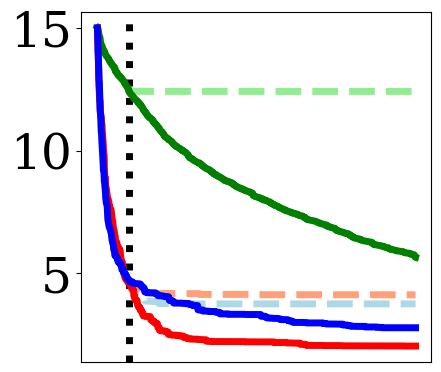

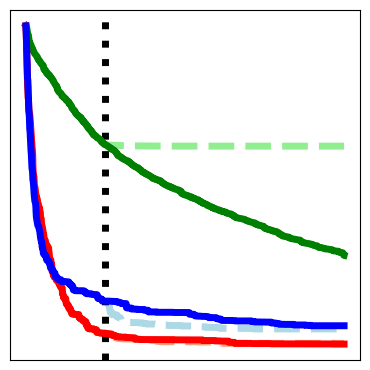

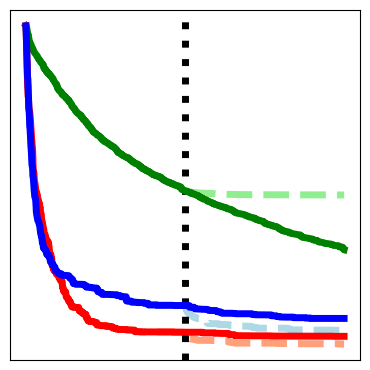

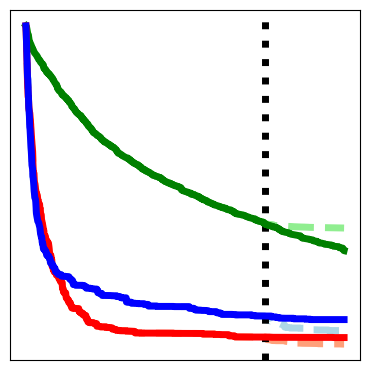

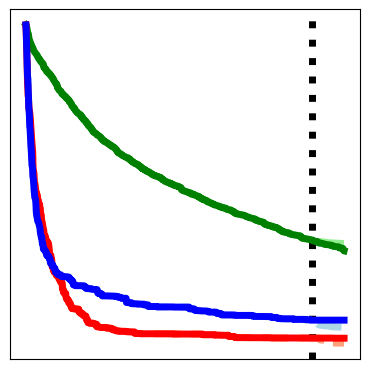

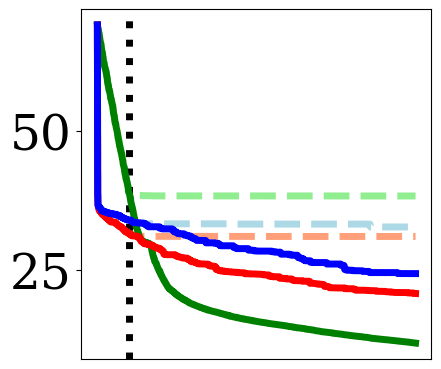

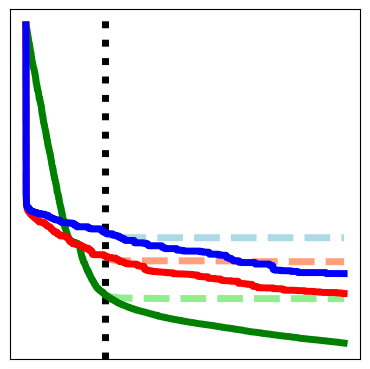

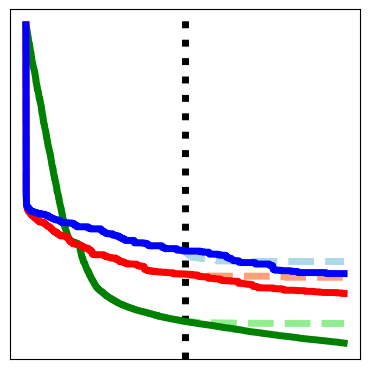

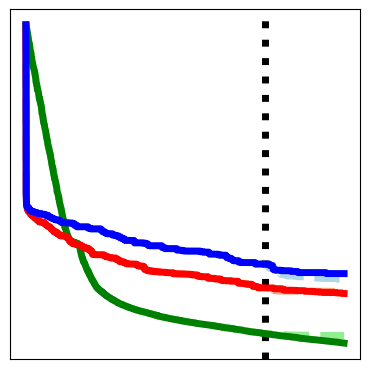

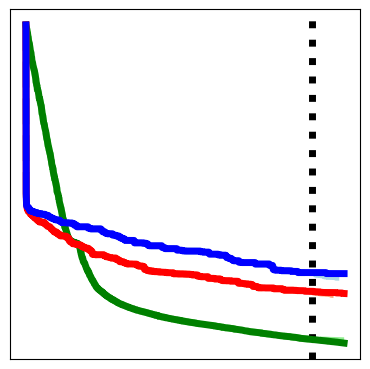

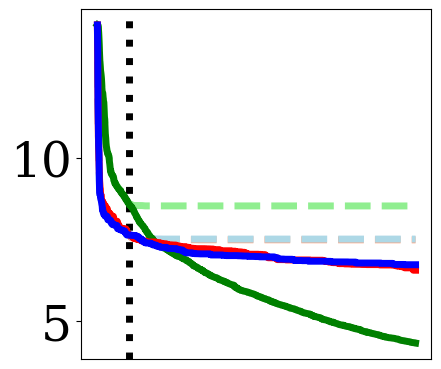

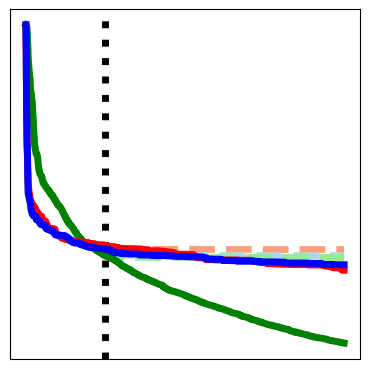

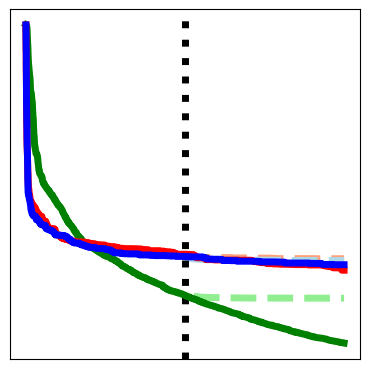

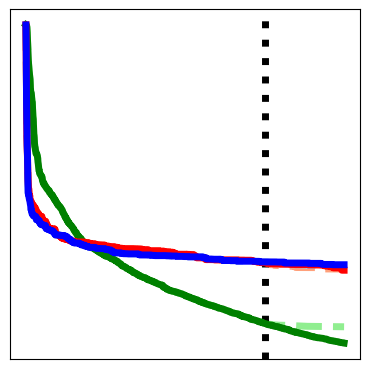

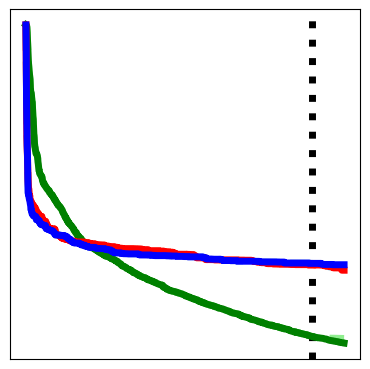

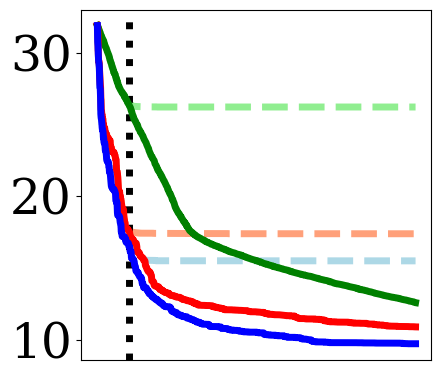

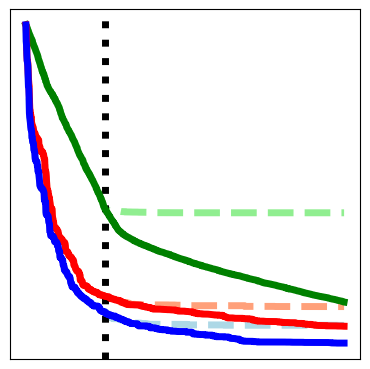

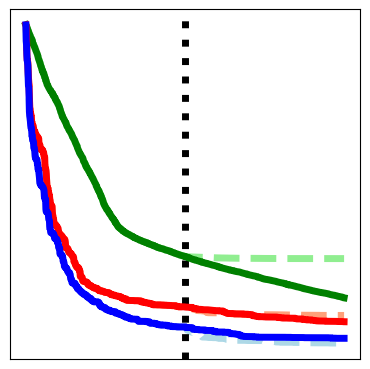

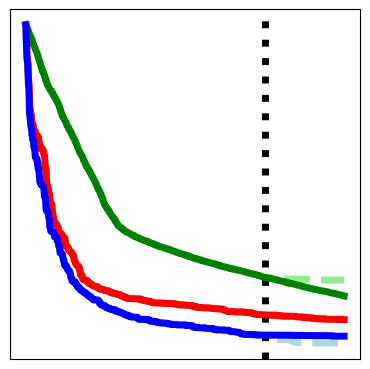

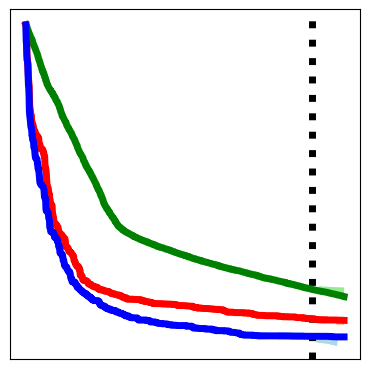

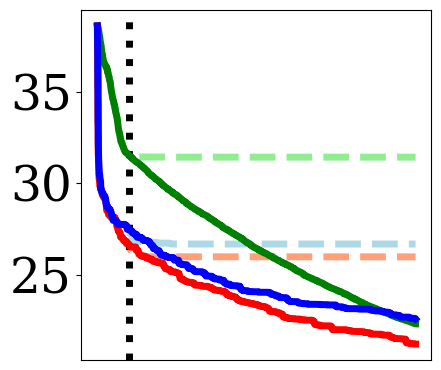

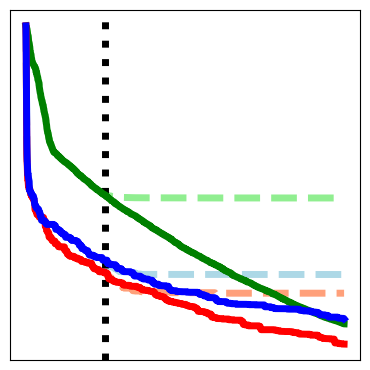

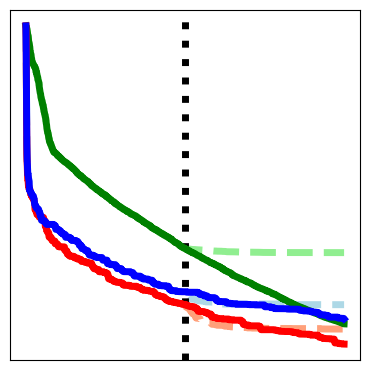

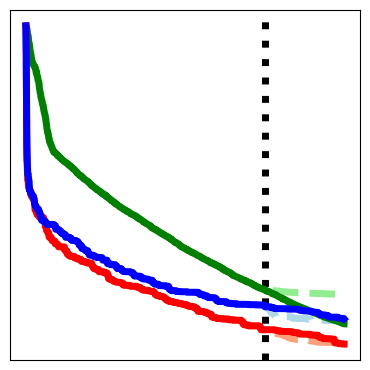

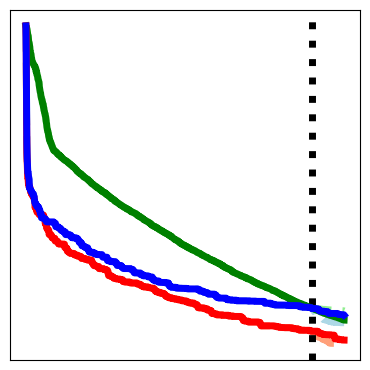

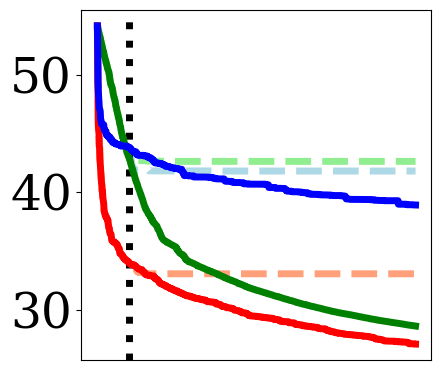

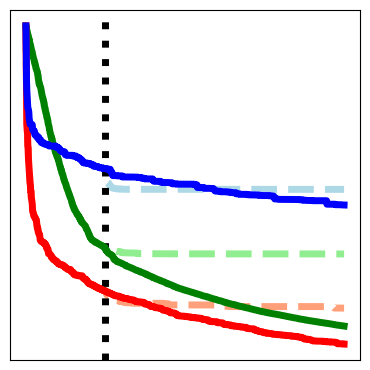

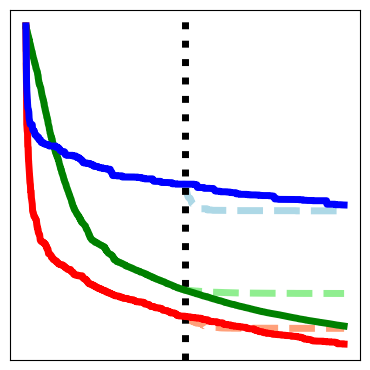

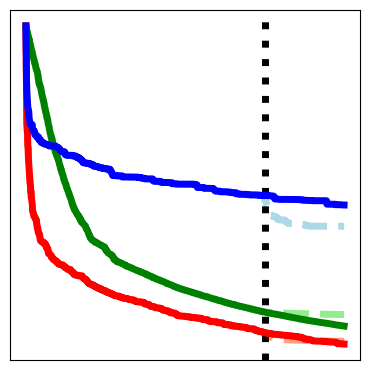

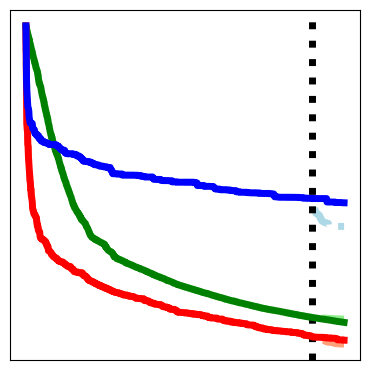

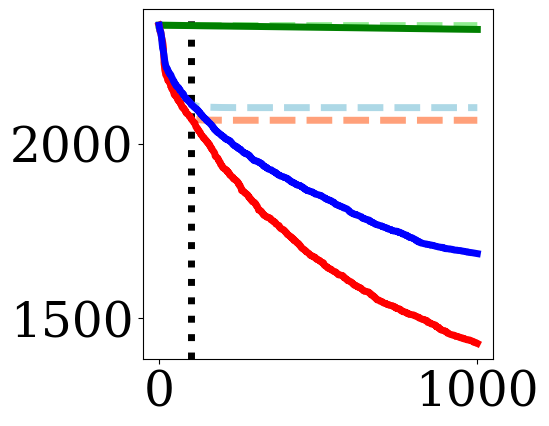

AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

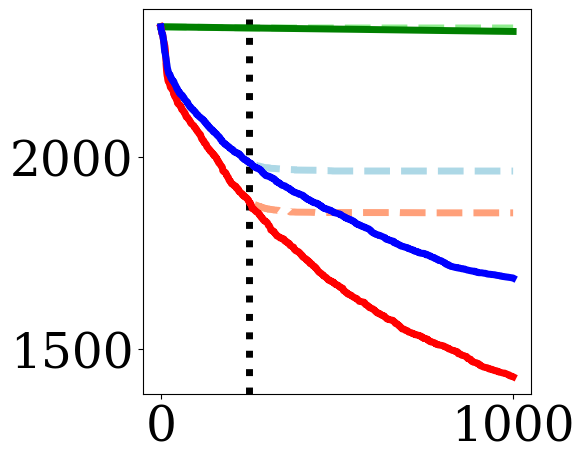

In [23]:
# fig_legend = plt.figure(figsize=(12, 3))  # Adjust figsize as needed to prevent clipping
# ax_legend = fig_legend.add_subplot(111)

for data in results_chull.dataset.unique():
    
    std_gsgp = results_chull.query("algo == 'SLIM+2SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
    gsgp_x1sig = results_chull.query("algo == 'SLIM*1SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
    gsgp_x1norm = results_chull.query("algo == 'SLIM*1NORM' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()


    for th in [100, 250, 500, 750, 900]:

        plt.figure(figsize = (5,5))
        
        for i, algo in enumerate(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']):
        
            
            grouped = results_chull.query("algo == @algo and dataset == @data and threshold == @th")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull", "elite_child"]].groupby('generation').median()

            plt.plot(grouped.index, grouped['training_fitness'], color = colors[i], linestyle = 'dashed', linewidth = 5, label = 'DEFLATE') #, label = algo

        plt.axvline(x = th, linestyle = 'dotted', color = 'black', linewidth = 5)
        
        plt.plot(std_gsgp.index, std_gsgp['training_fitness'], label = '+2SIG (STD_GSGP)', color = 'green', linewidth = 5)
        plt.plot(gsgp_x1sig.index, gsgp_x1sig['training_fitness'], label = 'X1SIG', color = 'red', linewidth = 5)
        plt.plot(gsgp_x1norm.index, gsgp_x1norm['training_fitness'], label = 'X1NORM', color = 'blue', linewidth = 5)  

        # plt.ylabel('Train Fitness')
        # plt.xlabel('Generation')
        # plt.legend(bbox_to_anchor=(1.1, 1.05))
        if th == 100 and data != 'ld50':
            plt.tick_params(
                            axis='x',          # changes apply to the x-axis
                            which='both',      # both major and minor ticks are affected
                            bottom=False,      # ticks along the bottom edge are off
                            top=False,         # ticks along the top edge are off
                            left = False,
                            right = False,
                            labelbottom=False) 
        elif th != 100 and data != 'ld50':
            plt.tick_params(top=False, bottom=False, left=False, right=False,
                    labelleft=False, labelbottom=False)
        elif th != 100 and data == 'ld50':
                    plt.set(yticklabels=[])
                    plt.tick_params(left=False)
            
        plt.tight_layout()
        plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
        
        # plt.rcParams.update({'figure.autolayout': True})
        plt.savefig(f'paper images/train fitness/{data}_{algo[-4:]}_{th}_tfitness.pdf', dpi = 400, bbox_inches='tight', pad_inches=0.1)
        plt.show()


# plt.rc('legend', fontsize=30, markerscale = 5)  # legend fontsize
# handles, labels = plt.get_legend_handles_labels()
# ordered_handles = [handles[3], handles[2], handles[4], handles[0], handles[5],   handles[1]]
# ordered_labels = [labels[3], labels[2],  labels[4], labels[0], labels[5],  labels[1]]
# fig_legend = plt.figure(figsize=(15, 2))
# ax_legend = fig_legend.add_subplot(111)
# ax_legend.legend(ordered_handles, ordered_labels, loc='center', ncol=3, frameon=False)
# ax_legend.axis('off')

# fig_legend.tight_layout()
# fig_legend.savefig(f"paper images/train fitness/legend.pdf", dpi=400)
# plt.close(fig_legend)

In [ ]:
# fig_legend = plt.figure(figsize=(12, 3))  # Adjust figsize as needed to prevent clipping
# ax_legend = fig_legend.add_subplot(111)

for data in results_chull.dataset.unique():
    
    std_gsgp = results_chull.query("algo == 'SLIM+2SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
    gsgp_x1sig = results_chull.query("algo == 'SLIM*1SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
    gsgp_x1norm = results_chull.query("algo == 'SLIM*1NORM' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()


    for th in [100, 250, 500, 750, 900]:

        plt.figure(figsize = (5,5))
        
        for i, algo in enumerate(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']):
        
            
            grouped = results_chull.query("algo == @algo and dataset == @data and threshold == @th")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull", "elite_child"]].groupby('generation').median()

            
            
            
            plt.plot(grouped.index, grouped['elite_size'], color = colors[i], linestyle = 'dashed', linewidth = 5, label = 'DEFLATE') #, label = algo
            plt.axvline(x = th, linestyle = 'dotted', color = 'black', linewidth = 5)
            # ax4.set_ylim(0, 3000)

            
        plt.plot(std_gsgp.index, std_gsgp['elite_size'], label = '+2SIG (STD_GSGP)', color = 'green', linewidth = 5)
        plt.plot(gsgp_x1sig.index, gsgp_x1sig['elite_size'], label = 'X1SIG', color = 'red', linewidth = 5)
        plt.plot(gsgp_x1norm.index, gsgp_x1norm['elite_size'], label = 'X1NORM', color = 'blue', linewidth = 5)
    
        if th == 100 and data != 'ld50':
            plt.tick_params(
                            axis='x',          # changes apply to the x-axis
                            which='both',      # both major and minor ticks are affected
                            bottom=False,      # ticks along the bottom edge are off
                            top=False,         # ticks along the top edge are off
                            left = False,
                            right = False,
                            labelbottom=False) 
        elif th != 100 and data != 'ld50':
            plt.tick_params(top=False, bottom=False, left=False, right=False,
                    labelleft=False, labelbottom=False)
        elif th != 100 and data == 'ld50':
                    plt.set(yticklabels=[])
                    plt.tick_params(left=False)
        # plt.ylabel('Elite size')
        # plt.xlabel('Generation')
        # plt.legend()

        plt.tight_layout()
        plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
        
        # plt.rcParams.update({'figure.autolayout': True})
        plt.savefig(f'paper images/elite size/{data}_{algo[-4:]}_{th}_esize.pdf', dpi = 400, bbox_inches='tight', pad_inches=0.1)
        plt.show()

# plt.rc('legend', fontsize=30, markerscale = 5)  # legend fontsize
# handles, labels = plt.get_legend_handles_labels()
# ordered_handles = [handles[3], handles[2], handles[4], handles[0], handles[5],   handles[1]]
# ordered_labels = [labels[3], labels[2],  labels[4], labels[0], labels[5],  labels[1]]
# fig_legend = plt.figure(figsize=(15, 2))
# ax_legend = fig_legend.add_subplot(111)
# ax_legend.legend(ordered_handles, ordered_labels, loc='center', ncol=3, frameon=False)
# ax_legend.axis('off')

# fig_legend.tight_layout()
# fig_legend.savefig(f"paper images/elite size/legend.pdf", dpi=400)
# plt.close(fig_legend)